In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
benign_0__mal_1          569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

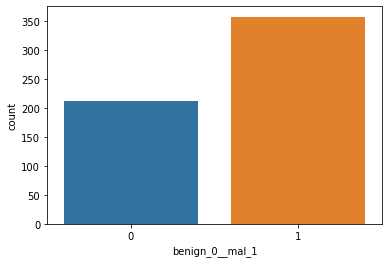

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

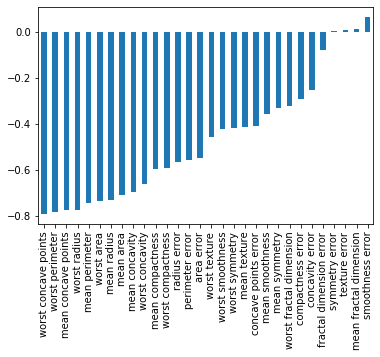

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

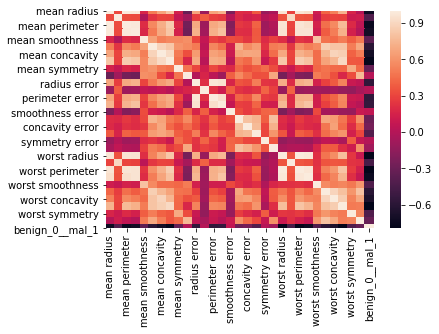

In [11]:

sns.heatmap(df.corr())

In [12]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Dropout

In [21]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6741 - val_loss: 0.6553
Epoch 2/600
426/426 [==============================] - 0s 75us/sample - loss: 0.6437 - val_loss: 0.6264
Epoch 3/600
426/426 [==============================] - 0s 117us/sample - loss: 0.6135 - val_loss: 0.5932
Epoch 4/600
426/426 [==============================] - 0s 85us/sample - loss: 0.5789 - val_loss: 0.5517
Epoch 5/600
426/426 [==============================] - 0s 107us/sample - loss: 0.5369 - val_loss: 0.5034
Epoch 6/600
426/426 [==============================] - 0s 110us/sample - loss: 0.4848 - val_loss: 0.4459
Epoch 7/600
426/426 [==============================] - ETA: 0s - loss: 0.428 - 0s 103us/sample - loss: 0.4318 - val_loss: 0.3915
Epoch 8/600
426/426 [==============================] - 0s 103us/sample - loss: 0.3875 - val_loss: 0.3493
Epoch 9/600
426/426 [=========================

426/426 [==============================] - 0s 76us/sample - loss: 0.0551 - val_loss: 0.1228
Epoch 76/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0539 - val_loss: 0.1210
Epoch 77/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0558 - val_loss: 0.1294
Epoch 78/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0525 - val_loss: 0.1190
Epoch 79/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0537 - val_loss: 0.1211
Epoch 80/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0544 - val_loss: 0.1279
Epoch 81/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0531 - val_loss: 0.1222
Epoch 82/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0538 - val_loss: 0.1190
Epoch 83/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0530 - val_loss: 0.1265
Epoch 84/600
426/426 [==============================] - 0s 57us/samp

426/426 [==============================] - 0s 111us/sample - loss: 0.0428 - val_loss: 0.1307
Epoch 153/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0425 - val_loss: 0.1432
Epoch 154/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0422 - val_loss: 0.1338
Epoch 155/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0422 - val_loss: 0.1341
Epoch 156/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0439 - val_loss: 0.1339
Epoch 157/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0432 - val_loss: 0.1358
Epoch 158/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0420 - val_loss: 0.1340
Epoch 159/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0453 - val_loss: 0.1327
Epoch 160/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0418 - val_loss: 0.1372
Epoch 161/600
426/426 [============================

Epoch 229/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0356 - val_loss: 0.1445
Epoch 230/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0372 - val_loss: 0.1493
Epoch 231/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0355 - val_loss: 0.1586
Epoch 232/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0349 - val_loss: 0.1415
Epoch 233/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0391 - val_loss: 0.1515
Epoch 234/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0350 - val_loss: 0.1486
Epoch 235/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0369 - val_loss: 0.1493
Epoch 236/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0360 - val_loss: 0.1411
Epoch 237/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0386 - val_loss: 0.1391
Epoch 238/600
426/426 [==============

426/426 [==============================] - 0s 103us/sample - loss: 0.0288 - val_loss: 0.1571
Epoch 306/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0331 - val_loss: 0.1555
Epoch 307/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0311 - val_loss: 0.1584
Epoch 308/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0299 - val_loss: 0.1554
Epoch 309/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0297 - val_loss: 0.1633
Epoch 310/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0288 - val_loss: 0.1642
Epoch 311/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0302 - val_loss: 0.1621
Epoch 312/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0282 - val_loss: 0.1688
Epoch 313/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0318 - val_loss: 0.1571
Epoch 314/600
426/426 [============================

426/426 [==============================] - 0s 108us/sample - loss: 0.0356 - val_loss: 0.1745
Epoch 382/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0271 - val_loss: 0.1775
Epoch 383/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0252 - val_loss: 0.1684
Epoch 384/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0262 - val_loss: 0.1795
Epoch 385/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0273 - val_loss: 0.1877
Epoch 386/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0315 - val_loss: 0.1695
Epoch 387/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0288 - val_loss: 0.2029
Epoch 388/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0286 - val_loss: 0.1582
Epoch 389/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0241 - val_loss: 0.1941
Epoch 390/600
426/426 [============================

426/426 [==============================] - 0s 102us/sample - loss: 0.0217 - val_loss: 0.1891
Epoch 458/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0217 - val_loss: 0.1732
Epoch 459/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0329 - val_loss: 0.1958
Epoch 460/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0245 - val_loss: 0.1831
Epoch 461/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0273 - val_loss: 0.1698
Epoch 462/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0279 - val_loss: 0.2325
Epoch 463/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0277 - val_loss: 0.1661
Epoch 464/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0246 - val_loss: 0.2006
Epoch 465/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0271 - val_loss: 0.1860
Epoch 466/600
426/426 [============================

426/426 [==============================] - 0s 112us/sample - loss: 0.0156 - val_loss: 0.2037
Epoch 534/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0168 - val_loss: 0.1866
Epoch 535/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0230 - val_loss: 0.2203
Epoch 536/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0194 - val_loss: 0.1739
Epoch 537/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0165 - val_loss: 0.2243
Epoch 538/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0166 - val_loss: 0.1728
Epoch 539/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0198 - val_loss: 0.2251
Epoch 540/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0196 - val_loss: 0.1878
Epoch 541/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0186 - val_loss: 0.2040
Epoch 542/600
426/426 [==============================] 

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

loss  val_loss
0    0.674148  0.655338
1    0.643713  0.626360
2    0.613542  0.593215
3    0.578859  0.551716
4    0.536921  0.503372
..        ...       ...
595  0.012800  0.197839
596  0.013735  0.221794
597  0.012789  0.205653
598  0.017028  0.171746
599  0.020101  0.335410

[600 rows x 2 columns]

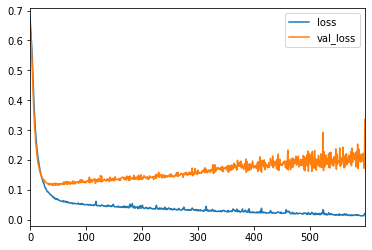

In [26]:
losses.plot()

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, the direction is automatically inferred
 |          from the name of the monitored quantity.
 |      baseline: Baseline value for the mo

In [30]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [31]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6722 - val_loss: 0.6406
Epoch 2/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6213 - val_loss: 0.5974
Epoch 3/600
426/426 [==============================] - 0s 117us/sample - loss: 0.5772 - val_loss: 0.5541
Epoch 4/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5325 - val_loss: 0.5073
Epoch 5/600
426/426 [==============================] - 0s 105us/sample - loss: 0.4862 - val_loss: 0.4582
Epoch 6/600
426/426 [==============================] - 0s 107us/sample - loss: 0.4339 - val_loss: 0.4103
Epoch 7/600
426/426 [==============================] - 0s 105us/sample - loss: 0.3860 - val_loss: 0.3587
Epoch 8/600
426/426 [==============================] - 0s 105us/sample - loss: 0.3406 - val_loss: 0.3173
Epoch 9/600
426/426 [==============================] - 0s 110us/sample - loss: 0.3044 - val_loss: 0.2831
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0528 - val_loss: 0.1088
Epoch 00078: early stopping


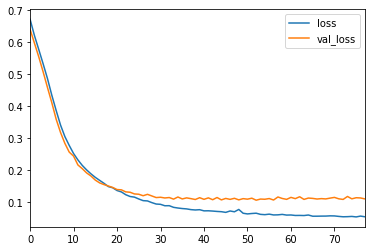

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6794 - val_loss: 0.6653
Epoch 2/600
426/426 [==============================] - 0s 90us/sample - loss: 0.6671 - val_loss: 0.6445
Epoch 3/600
426/426 [==============================] - 0s 124us/sample - loss: 0.6590 - val_loss: 0.6309
Epoch 4/600
426/426 [==============================] - 0s 106us/sample - loss: 0.6411 - val_loss: 0.6189
Epoch 5/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6388 - val_loss: 0.6070
Epoch 6/600
426/426 [==============================] - 0s 128us/sample - loss: 0.6052 - val_loss: 0.5926
Epoch 7/600
426/426 [==============================] - 0s 117us/sample - loss: 0.5961 - val_loss: 0.5730
Epoch 8/600
426/426 [==============================] - 0s 117us/sample - loss: 0.5834 - val_loss: 0.5459
Epo

426/426 [==============================] - 0s 146us/sample - loss: 0.1255 - val_loss: 0.0947
Epoch 75/600
426/426 [==============================] - 0s 149us/sample - loss: 0.1267 - val_loss: 0.0982
Epoch 76/600
426/426 [==============================] - 0s 129us/sample - loss: 0.1123 - val_loss: 0.0962
Epoch 77/600
426/426 [==============================] - 0s 140us/sample - loss: 0.1331 - val_loss: 0.0914
Epoch 78/600
426/426 [==============================] - 0s 132us/sample - loss: 0.1612 - val_loss: 0.0960
Epoch 79/600
426/426 [==============================] - 0s 131us/sample - loss: 0.1392 - val_loss: 0.0977
Epoch 80/600
426/426 [==============================] - 0s 143us/sample - loss: 0.1152 - val_loss: 0.1100
Epoch 81/600
426/426 [==============================] - 0s 141us/sample - loss: 0.1302 - val_loss: 0.0959
Epoch 82/600
426/426 [==============================] - 0s 140us/sample - loss: 0.1117 - val_loss: 0.0977
Epoch 83/600
426/426 [==============================] - 0s 

In [37]:
model_loss = pd.DataFrame(model.history.history)

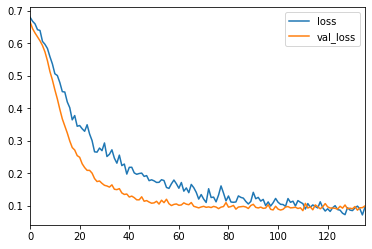

In [38]:
model_loss.plot()

In [39]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [43]:
predictions = model.predict_classes(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [46]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
